In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import pandas as pd

# Code

In [2]:
class JV_Analysis():
    
    
    def __init__(self):
        """
        Initialize the JV_Analysis class
        """
        
        self.color_list = ['red', 'blue', 'green', 'orange', 'purple',
            'black', 'cyan', 'magenta', 'pink', 'brown', 'lime',
            'olive', 'teal', 'navy', 'maroon', 'indigo', 'silver', 'gray',
            'gold', 'crimson', 'darkred', 'darkblue', 'darkgreen', 'darkorange',
            'darkcyan', 'darkmagenta',
            'darkolive', 'darkteal', 'darknavy', 'darkmaroon',
            'darkindigo', 'darkgray', 'darkgold', 'darkcrimson', 'lightred', 'lightblue',
            'lightgreen', 'lightorange', 'lightpurple', 'lightcyan', 'lightmagenta',
            'lightyellow', 'lightpink', 'lightbrown', 'lighthotpink', 'lightlime',
            'lightolive', 'lightteal', 'lightnavy', 'lightmaroon', 'lightindigo',
            'lightgray', 'lightgold', 'lightcrimson', 'darkturquoise', 'lightturquoise',
            'darkviolet', 'lightviolet', 'darkcyan', 'lightcyan', 'darkblue', 'lightblue',
            'darkgreen', 'lightgreen', 'darkorange', 'lightorange', 'darkpurple',
            'lightpurple', 'darkred', 'lightred', 'darkmagenta', 'lightmagenta',
            'lightyellow', 'lightpink', 
            'lightbrown', 'lightlime', 'darkolive', 'lightolive', 'darkteal',
            'lightteal', 'darknavy', 'lightnavy', 'darkmaroon', 'lightmaroon', 'darkindigo',
            'lightindigo', 'darkgray', 'lightgray', 'darkgold', 'lightgold', 'darkcrimson',
            'lightcrimson', 'darkturquoise', 'lightturquoise', 'darkviolet', 'lightviolet',
            'darkcyan', 'lightcyan', 'darkblue', 'lightblue', 'darkgreen', 'lightgreen', 'darkorange', 'light']
        
        self.params = ["PCE (%)", "Jsc (mA/cm2)", "Voc (V)", "FF (%)", "Rsh (Ohm/cm2)", "Rs (Ohm/cm2)"]
        
        
        self.load_data()
        self.build_dictionaries()
    
    
    def load_data(self):
        """
        Load data generically into dict[filename]={'x','y'}
        """
        
        dir = os.getcwd()
        data_dir = os.path.join(dir,'Data')
        output_dir = os.path.join(dir,'Output')
        if os.path.exists(output_dir) == False:
            os.mkdir(output_dir)
        sample_groups = [name for name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, name))]
        sample_sets = []
        raw_data = {}

        # If we have multiple groups
        if len(sample_groups)>0:

            for sample_group in sample_groups:
                sample_group_folder = os.path.join(data_dir,sample_group)
                samples = [name for name in os.listdir(sample_group_folder) if os.path.isfile(os.path.join(sample_group_folder, name))]
                sample_set = []
                
                for sample in samples:
                    sample_path = os.path.join(sample_group_folder,sample)
                    name = sample.split('.')[0]
                    temp = np.loadtxt(sample_path, skiprows=1,delimiter=',').transpose()
                    raw_data[name] = {
                        'x' : temp[4],
                        'y' : temp[2],
                    }
                    sample_set.append(name)
                sample_sets.append(sample_set)

        #Else just make 'All' Category
        else:
            sample_groups = ['All']
            sample_sets = []
            samples = [name for name in os.listdir(data_dir) if os.path.isfile(os.path.join(data_dir, name))]
            sample_set = []
            for sample in samples:
                sample_path = os.path.join(data_dir,sample)
                name = sample.split('.')[0]
                temp = np.loadtxt(sample_path, skiprows=1,delimiter=',').transpose()
                raw_data[name] = {
                    'x' : temp[4],
                    'y' : temp[2],
                }
                sample_set.append(name)
            sample_sets.append(sample_set)
        
        self.raw_data = raw_data
        self.sample_sets = sample_sets
        self.sample_groups = sample_groups
        self.output_dir = output_dir
        
            
    
    
    def build_dictionaries(self):
        """
        Build modified dictionary lists for code. 
        
        # in list refers to sample group #
        
        dict[sample][pixel][scan #][direction] = {all useful data}
        """
    
        data = {}
        subs_included = []
        devs_included = []
        scans_included = []
        groupings = []

        for sample_set in self.sample_sets:
            
            group = []
                
            for sample in sample_set:
                
                # get info from dictionary
                name = sample.split('_')[0]
                pixel = sample.split('_')[1]
                direction = sample.split('_')[-2]
                x = self.raw_data[sample]['x']
                y = self.raw_data[sample]['y']
                if len(sample.split('_')) == 4:
                    scan_num = '1'
                else:
                    scan_num = sample.split('_')[2]
                
                
                # if its first time were looking at sample, then make a dict for pixel
                if f'{name}' not in subs_included:
                    subs_included.append(f'{name}')
                    data[name] = dict()
                
                # if its first time were looking at dev, then make dict for scan numbers
                if f'{name}_{pixel}' not in devs_included:
                    devs_included.append(f'{name}_{pixel}')
                    data[name][pixel] = dict()
                
                # if its the first time were looking at scan num, then make a dict for directions
                if f'{name}_{pixel}_{scan_num}' not in scans_included:
                    scans_included.append(f'{name}_{pixel}_{scan_num}')
                    data[name][pixel][scan_num] = dict()

                # make dict[Sample#_Pixel#][Scan#][direction]
                data[name][pixel][scan_num][direction] = {
                    'name' : name,
                    'pixel' : pixel,
                    'direction' : direction,
                    'scam number' : scan_num,
                    'v' : x,
                    'j' : y,
                }
                
                if direction == 'fwd':
                    group.append((name,pixel,scan_num))
            
            groupings.append(group)

        # data[name][pixel][scan][direction]
        # groupings --> [[(name, pixel,scan)],...]


        for sample in data.keys():
            for pixel in data[sample].keys():
                for scan in data[sample][pixel].keys():
                    for direction in data[sample][pixel][scan].keys():
                        params = self.calculate_jv_parameters(data[sample][pixel][scan][direction]['v'], data[sample][pixel][scan][direction]['j'])
                        data[sample][pixel][scan][direction].update(params)

        for sample in data.keys():
            
            # group_pces = []
            # group_pces_key = []
            
            for pixel in data[sample].keys():
                
                # for each pixel calc the avg fwd+rev pce
                pces = []
                pce_key = []
                
                for scan in data[sample][pixel].keys():
                    
                    pce = 0
                    
                    for direction in data[sample][pixel][scan].keys():
                        pce += data[sample][pixel][scan][direction]['PCE (%)']
                    pce /= len(data[sample][pixel][scan].keys())
                    
                    pces.append(pce)
                    pce_key.append(scan)
                    
                    # group_pces.append(pce)
                    # pce_key.append(scan)
                
                # calc max pce scan number
                max_index = pces.index(max(pces))
                scan_num = pce_key[max_index]
                
                # set 'best scan' in dictionary
                for scan in data[sample][pixel].keys():
                    if scan ==  scan_num:
                        for direction in data[sample][pixel][scan].keys():
                            data[sample][pixel][scan][direction]['best scan'] = True
                            # print('best : ' ,sample, pixel, scan, direction)
                    else:
                        for direction in data[sample][pixel][scan].keys():
                            data[sample][pixel][scan][direction]['best scan'] = False
        
        self.data = data
        self.groupings = groupings


    def calculate_jv_parameters(self, v: list, j: list) -> dict:
        """Takes in voltage, current, and power vectors, calculates scalars and returns a dictionary of scalars

        Args:
            v (list): list of voltage vectors
            j (list): list of current vectors


        Returns:
            dict: dictionary of parameter values over time
        """

        
        derivative_v_step = 0.1
        p = v*j

        # Try to calculate scalars
        try:

            # Calculate Jsc and Rsh using J(v=0) to J(v = v_dir)
            wherevis0 = np.nanargmin(np.abs(v))
            wherevis0_1 = np.nanargmin(np.abs(v - derivative_v_step))
            j1 = j[wherevis0]
            j2 = j[wherevis0_1]
            v1 = v[wherevis0]
            v2 = v[wherevis0_1]
            m = (j2 - j1) / (v2 - v1)
            b = j1 - m * v1
            if m != 0:
                rsh = float(abs(1 / m))
                jsc = float(b)
            else:
                rsh = np.inf
                jsc = float(b)

            # Calculate Voc and Rs from J(J=0) to derivative_v_step V before
            v_iter = max(math.ceil(derivative_v_step / (v[2] - v[1])), 1)
            wherejis0 = np.nanargmin(np.abs(j))
            wherejis0_1 = wherejis0 - int(v_iter)
            j1 = j[wherejis0]
            j2 = j[wherejis0_1]
            v1 = v[wherejis0]
            v2 = v[wherejis0_1]
            m = (j2 - j1) / (v2 - v1)
            b = j1 - m * v1
            rs = float(abs(1 / m))
            voc = float(-b / m)

            # Calculate Pmp, Vmp, Jmp
            pmp = np.nanmax(p)
            pmaxloc = np.nanargmax(p)
            vmp = v[pmaxloc]
            jmp = j[pmaxloc]

            # Calculate Rch using Vmpp-(derivative_v_step/2) V to vmpp+(derivative_v_step/2) V
            j1 = j[pmaxloc - math.floor(v_iter / 2)]
            j2 = j[pmaxloc + math.floor(v_iter / 2)]
            v1 = v[pmaxloc - math.floor(v_iter / 2)]
            v2 = v[pmaxloc + math.floor(v_iter / 2)]
            if j1 != j2 and v1 != v2:
                m = (j2 - j1) / (v2 - v1)
                rch = float(abs(1 / m))
            else:
                rch = np.nan

            # Calculate FF and PCE if its not going to throw an error, else flag FF as NaN
            if pmp > 0 and voc > 0 and jsc > 0:
                ff = 100 * pmp / (voc * jsc)
                pce = ff * jsc * voc / 100
            else:
                ff = np.nan

        # If we run into any issues, just make values for time NaN
        except:
            jsc = np.nan
            rsh = np.nan
            voc = np.nan
            rs = np.nan
            vmp = np.nan
            jmp = np.nan
            pmp = np.nan
            rch = np.nan
            ff = np.nan
            pce = np.nan

        # Create dictionary to hold data
        returndict = {
            "PCE (%)": pce,
            "Jsc (mA/cm2)": jsc,
            "Voc (V)": voc,
            "FF (%)": ff,
            "Rsh (Ohm/cm2)": rsh,
            "Rs (Ohm/cm2)": rs,
            "Rch (Ohm/cm2)": rch,
            "Jmp (mA/cm2)": jmp,
            "Vmp (V)": vmp,
            "Pmp (mW/cm2)": pmp,
        }

        return returndict
    
    def filter_data(self, param, number):
        """
        Filter the data, removing points where param < number
        """
        
        for idx, group in enumerate(self.groupings):
            for sg, sample_set in enumerate(group):
                sample,pixel,scan = sample_set
                if self.data[sample][pixel][scan]['fwd'][param] <= number:
                    self.groupings[idx].remove(sample_set)
                elif self.data[sample][pixel][scan]['rev'][param] <= number:
                    self.groupings[idx].remove(sample_set)

                
    
    def plot_groups_all(self):
        """
        Plot all scans for each group
        """
        
        for idx, group in enumerate(self.groupings):
    
            fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi = 360)
            index = 0
            
            for sample_set in group:
                sample,pixel,scan = sample_set
                for direction in self.data[sample][pixel][scan].keys():
                    if direction == 'rev':
                        ax.plot(self.data[sample][pixel][scan][direction]['v'],
                                self.data[sample][pixel][scan][direction]['j'],
                                color = self.color_list[index],
                                label = f'{sample}_{pixel}_{scan}')
                    if direction == 'fwd':
                        ax.plot(self.data[sample][pixel][scan][direction]['v'],
                                self.data[sample][pixel][scan][direction]['j'],
                                color = self.color_list[index],
                                linestyle = '--')
                index += 1
            ax.set_title(f'All Scans: {self.sample_groups[idx]}')
            ax.set_xlabel('Voltage (V)')
            ax.set_ylabel('Current Denisty (|mA/cm2)')
            ax.set_ylim(-1,28)
            fig.tight_layout()
            fig.savefig(os.path.join(self.output_dir,f'All_JVs_{self.sample_groups[idx]}.png'))

            # Add Legend
            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    def plot_groups_best(self):
        """
        Plot best scans for each group
        """
        for idx, group in enumerate(self.groupings):

            fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi = 360)
            index = 0
            
            for sample_set in group:
                sample,pixel,scan = sample_set
                for direction in self.data[sample][pixel][scan].keys():
                    if self.data[sample][pixel][scan][direction]['best scan']:
                        if direction == 'rev':
                            ax.plot(self.data[sample][pixel][scan][direction]['v'],
                                    self.data[sample][pixel][scan][direction]['j'],
                                    color = self.color_list[index],
                                    label = f'{sample}_{pixel}_{scan}')
                        if direction == 'fwd':
                            ax.plot(self.data[sample][pixel][scan][direction]['v'],
                                    self.data[sample][pixel][scan][direction]['j'],
                                    color = self.color_list[index],
                                    linestyle = '--')
                index += 1
            
            ax.set_title(f'Best Scans: {self.sample_groups[idx]}')
            ax.set_xlabel('Voltage (V)')
            ax.set_ylabel('Current Denisty (|mA/cm2)')
            ax.set_ylim(-1,28)
            fig.tight_layout()
            fig.savefig(os.path.join(self.output_dir,f'Best_JVs_{self.sample_groups[idx]}.png'))

            # Add Legend
            box = ax.get_position()
            ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
            ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    def plot_substrates(self):
        """
        Plot all scans for each substrate
        """
        
        for sample in self.data.keys():
            for pixel in self.data[sample].keys():
                
                fig, ax = plt.subplots(1, 1, figsize=(4,3), dpi = 360)
                
                for scan in self.data[sample][pixel].keys():
                    if self.data[sample][pixel][scan]['fwd']['best scan']:
                        for direction in self.data[sample][pixel][scan].keys():
                            if direction == 'rev':
                                ax.plot(self.data[sample][pixel][scan][direction]['v'],
                                        self.data[sample][pixel][scan][direction]['j'],
                                        color = self.color_list[0],
                                        label = f'{sample}_{pixel}_{scan}')
                            if direction == 'fwd':
                                ax.plot(self.data[sample][pixel][scan][direction]['v'],
                                        self.data[sample][pixel][scan][direction]['j'],
                                        color = self.color_list[0],
                                        linestyle = '--')
                    else:
                        for direction in self.data[sample][pixel][scan].keys():
                            if direction == 'rev':
                                ax.plot(self.data[sample][pixel][scan][direction]['v'],
                                        self.data[sample][pixel][scan][direction]['j'],
                                        color = 'grey',
                                        label = f'{sample}_{pixel}_{scan}')
                            if direction == 'fwd':
                                ax.plot(self.data[sample][pixel][scan][direction]['v'],
                                        self.data[sample][pixel][scan][direction]['j'],
                                        color = 'grey',
                                        linestyle = '--')    
                
                    ax.set_title(f'Sample {sample}, Pixel {pixel}')
                    ax.set_xlabel('Voltage (V)')
                    ax.set_ylabel('Current Denisty (|mA/cm2)')
                    ax.set_ylim(-1,28)
                    fig.tight_layout()
                    fig.savefig(os.path.join(self.output_dir,f'{sample}_{pixel}.png'))
                    
    
    
    def params_scatter(self):
        """
        Plot scatter plot of paratemers for the best scans from each pixel, seperated by sample group
        """
        
        fig, axs = plt.subplots(2, 3, figsize=(5,5), dpi=300)
        axs = axs.flatten()

        index = 0
        for sg, sample_group in enumerate(self.groupings):
            for sample_set in sample_group:
                sample,pixel,scan = sample_set
                for direction in self.data[sample][pixel][scan].keys():
                    for idx, param in enumerate(self.params):
                        if self.data[sample][pixel][scan][direction]['best scan']:
                            if direction == 'rev':
                                if idx == 3:
                                    axs[idx].scatter(sg+1,
                                            self.data[sample][pixel][scan][direction][param],
                                            color = self.color_list[index],
                                            label = f'{sample}_{pixel}_{scan}',
                                            marker = 'o')
                                else:
                                    axs[idx].scatter(sg+1,
                                            self.data[sample][pixel][scan][direction][param],
                                            color = self.color_list[index],
                                            marker = 'o')
                            if direction == 'fwd':
                                axs[idx].scatter(sg+1,
                                        self.data[sample][pixel][scan][direction][param],
                                        color = self.color_list[index],
                                        marker = 'x')
                index += 1

        fig.tight_layout()

        for sample_group in self.sample_groups:
            for idx, param in enumerate(self.params):
                
                ticks = [0] + [x + 1 for x in range(len(self.sample_groups))] + [len(self.sample_groups)+1]
                tick_labs = ['']+ self.sample_groups + ['']
                axs[idx].set_xticks(ticks, tick_labs,rotation = 35)
                axs[idx].set_ylabel(param)
                
                                
                

        box = axs[3].get_position()
        axs[3].set_position([box.x0, box.y0, box.width * 0.8, box.height])
        fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        fig.savefig(os.path.join(self.output_dir,f'Parameters_Scatter.png'))
    
    
    def params_box(self):
        """
        Plot boxplot of paratemers for the best scans from each pixel, seperated by sample group
        """
        fig, axs = plt.subplots(2, 3, figsize=(5,5), dpi=300)
        axs = axs.flatten()
        index = 0

        for idx, param in enumerate(self.params):
            
            s_data = []
            s_index = []
            index = 0
                
            for sg, sample_group in enumerate(self.groupings):
                
                fwd_p = []
                rev_p = []
                
                for sample_set in sample_group:
                    sample,pixel,scan = sample_set
                    for direction in self.data[sample][pixel][scan].keys():
                        if self.data[sample][pixel][scan][direction]['best scan']:
                            if direction == 'rev':
                                rev_p.append(self.data[sample][pixel][scan][direction][param])
                            if direction == 'fwd':
                                fwd_p.append(self.data[sample][pixel][scan][direction][param])
                    
                s_data.append(fwd_p)
                s_data.append(rev_p)
                s_index.append((index+0.9))
                s_index.append((index+1.1))
                index += 1 
                
            
            axs[idx].boxplot(s_data, positions = s_index)

        fig.tight_layout()
        fig.savefig(os.path.join(self.output_dir,f'Parameters_BoxWhisker.png'))

        for sample_group in self.sample_groups:
            for idx, param in enumerate(self.params):
                
                ticks = [0] + [x + 1 for x in range(len(self.sample_groups))] + [len(self.sample_groups)+1]
                tick_labs = ['']+ self.sample_groups + ['']
                axs[idx].set_xticks(ticks, tick_labs,rotation = 35)
                axs[idx].set_ylabel(param)
    
    
    def params_df(self):
        """
        Create .csv file where columns are paramters and rows are samples
        """
        
        param_dfs = []

        #cycle through each group
        for group in self.groupings:

            df_data = []
            df_header = []
            df_index = []
            
            # for each sample in group get useful info
            for sn, sample_set in enumerate(group):
                
                sample,pixel,scan = sample_set
                temp = []
                
                # cycle through direction of scan and number of scans
                for direction in self.data[sample][pixel][scan].keys():
                    for idx, param in enumerate(self.params):
                        
                        # if first parameter & best device & fwd scan, add device name
                        if (idx == 0) & (self.data[sample][pixel][scan][direction]['best scan'] == True) & (direction == 'fwd'):
                            #df_index.append(f'{sample}_{pixel}')
                            temp.append(f'{sample}_{pixel}_{scan}')
                        
                        # if first sample, add parameter name
                        if (sn == 0):
                            df_header.append(f'{direction.capitalize()} {param}')

                        # build data
                        if self.data[sample][pixel][scan][direction]['best scan']:
                            temp.append(self.data[sample][pixel][scan][direction][param])

                if len(temp) > 0:
                    df_data.append(temp)

            df_scalars = pd.DataFrame(data = df_data, columns = ['Name']+ df_header)#, index = df_index)
            param_dfs.append(df_scalars)
            
        for idx in range(len(param_dfs)):
            display(param_dfs[idx])
            param_dfs[idx].to_csv(os.path.join(self.output_dir,f'Parameters_{self.sample_groups[idx]}.csv'), index = False)
    
    def help(self):
        string = """
        Required File/Data Organization:
        - Root:
        - Root:notebook.ipynb
        - Root:Data:
        - Root:Data:Group1:
        - Root:Data:Group1:data.csv x n
        - Root:Data:Group2:
        - Root:Data:Group2:data.csv x n

        JV_Analysis Options:
        - plot_substrates(): Plots data per substrate
        - plot_groups_all(): Plots all data per sample group
        - plot_groups_best(): Plots best scans per sample group
        - filter_data(parameter, minvalue): filters paramter to minimum value ** e.g. 'Voc (V)'
        - params_scatter(): plots scatter plot of figures of merrit
        - params_box(): plots box and whisker of figures of merrit
        - params_df(): create dataframe for parameters

        Example code:

            c = JV_Analysis()
            c.params_df()
            c.params()
        """
        print(string)


# Analysis

In [3]:
c = JV_Analysis()
c.help()


        Required File/Data Organization:
        - Root:
        - Root:notebook.ipynb
        - Root:Data:
        - Root:Data:Group1:
        - Root:Data:Group1:data.csv x n
        - Root:Data:Group2:
        - Root:Data:Group2:data.csv x n

        JV_Analysis Options:
        - plot_substrates(): Plots data per substrate
        - plot_groups_all(): Plots all data per sample group
        - plot_groups_best(): Plots best scans per sample group
        - filter_data(parameter, minvalue): filters paramter to minimum value ** e.g. 'Voc (V)'
        - params_scatter(): plots scatter plot of figures of merrit
        - params_box(): plots box and whisker of figures of merrit
        - params_df(): create dataframe for parameters

        Example code:

            c = JV_Analysis()
            c.params_df()
            c.params()
        


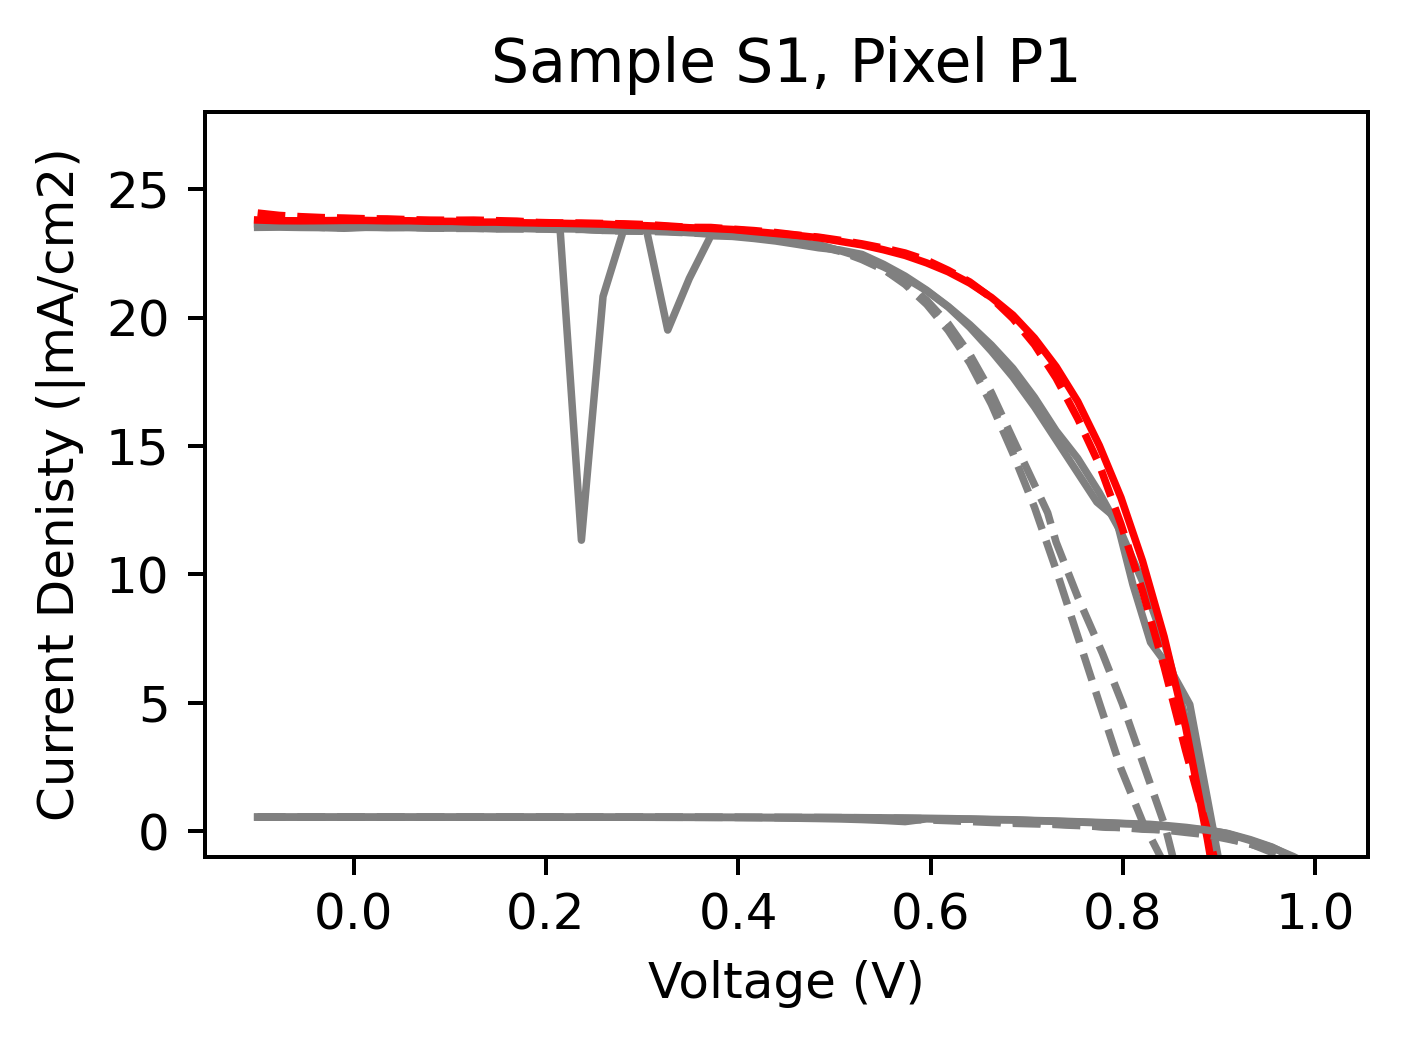

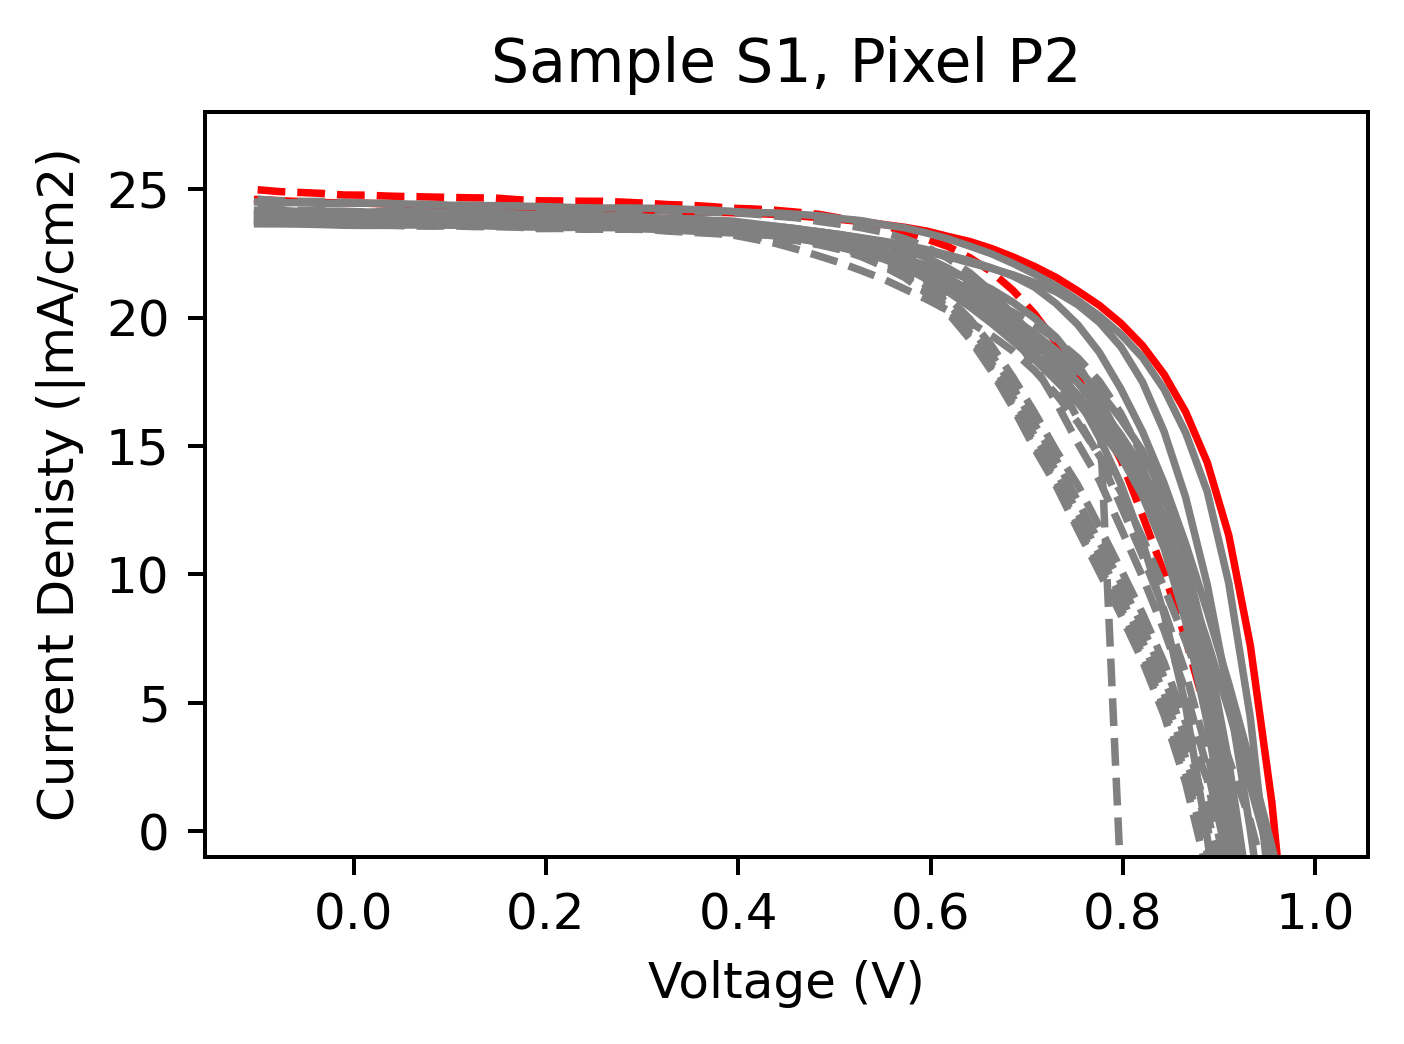

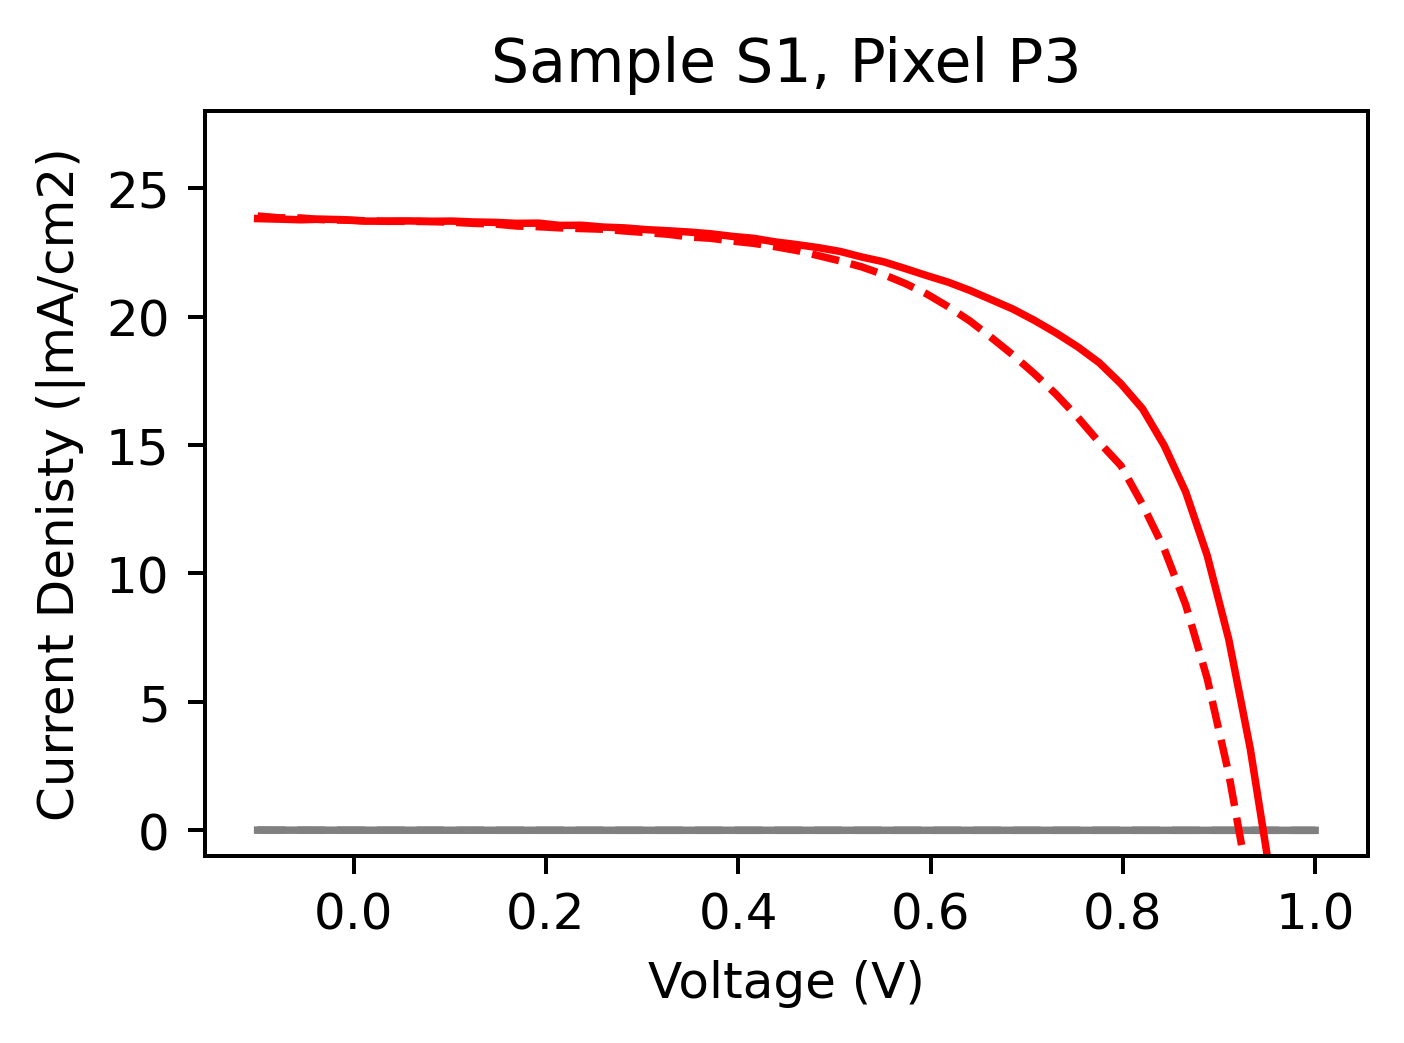

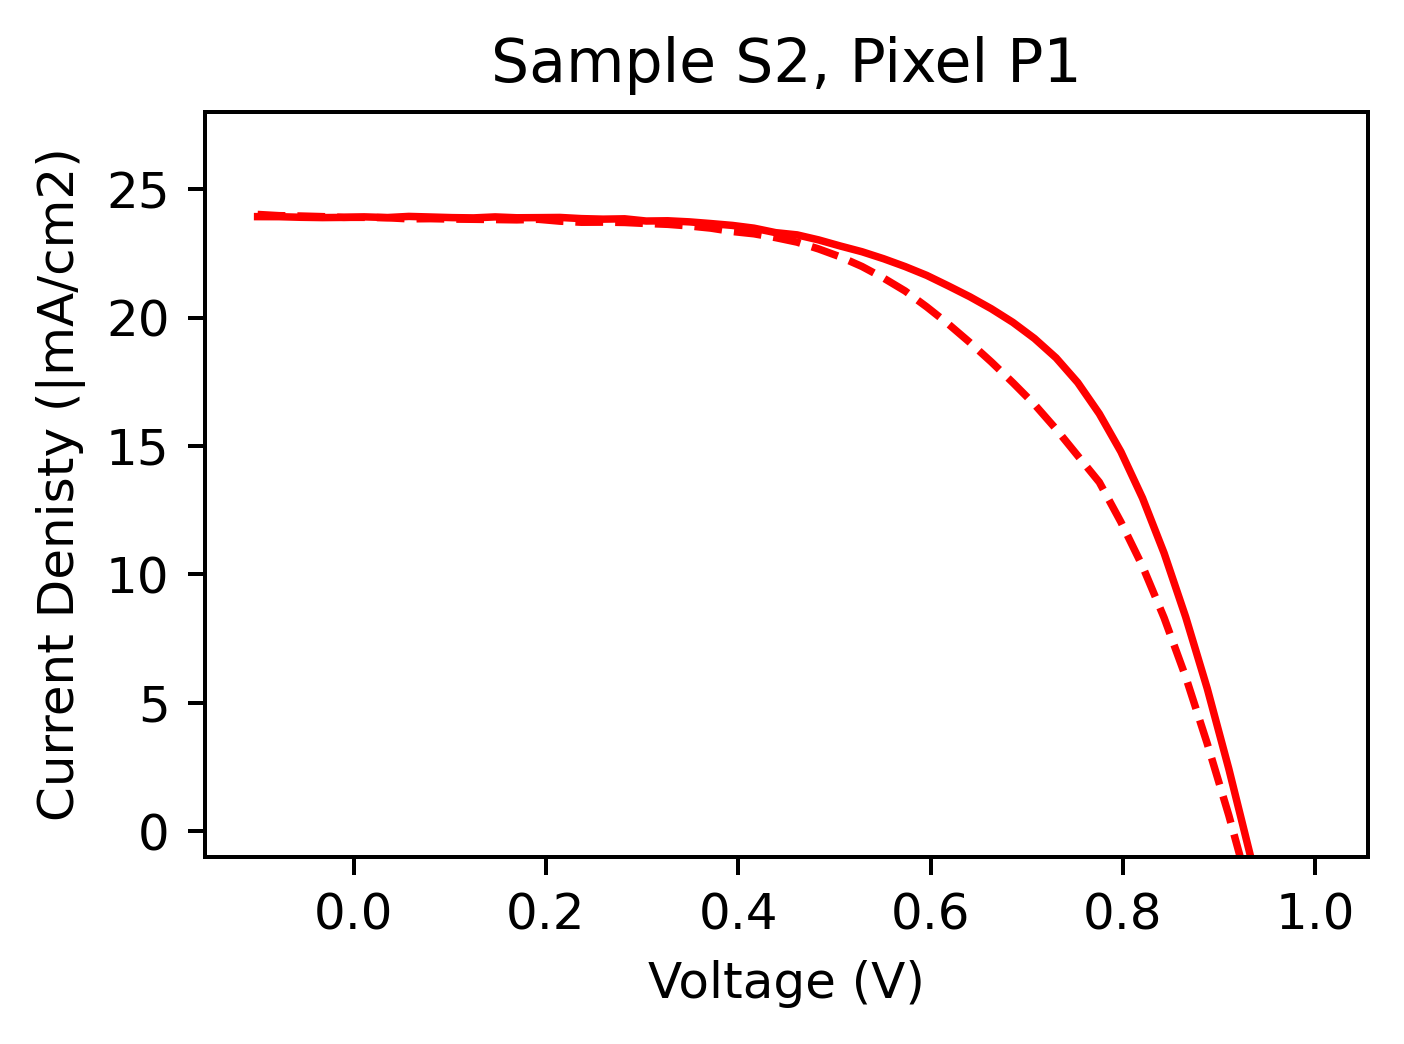

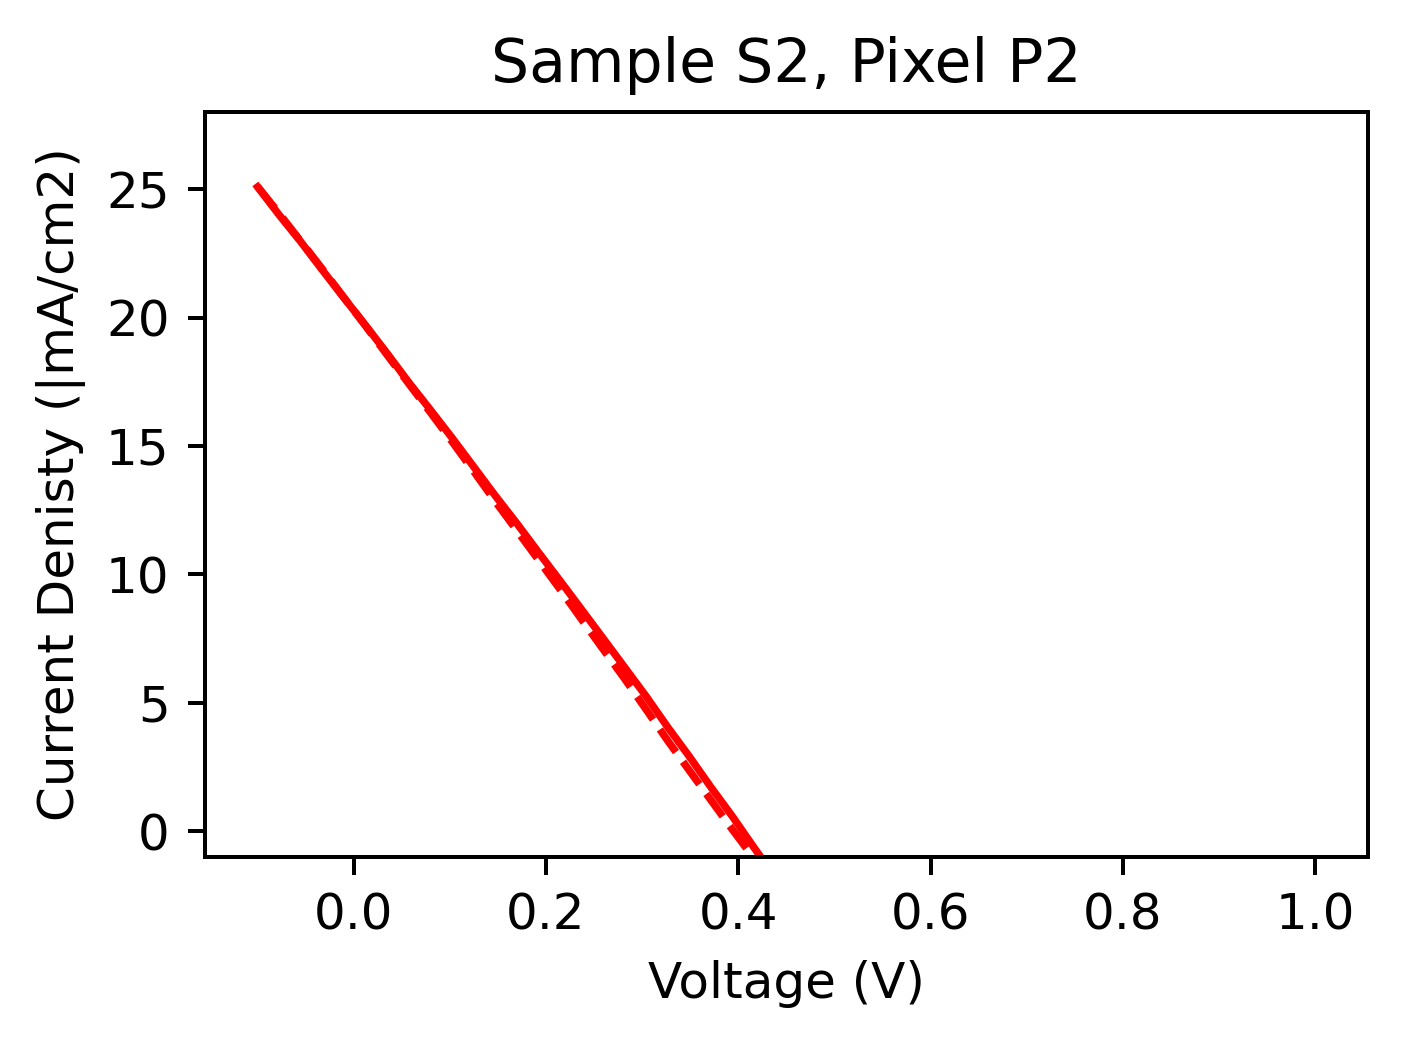

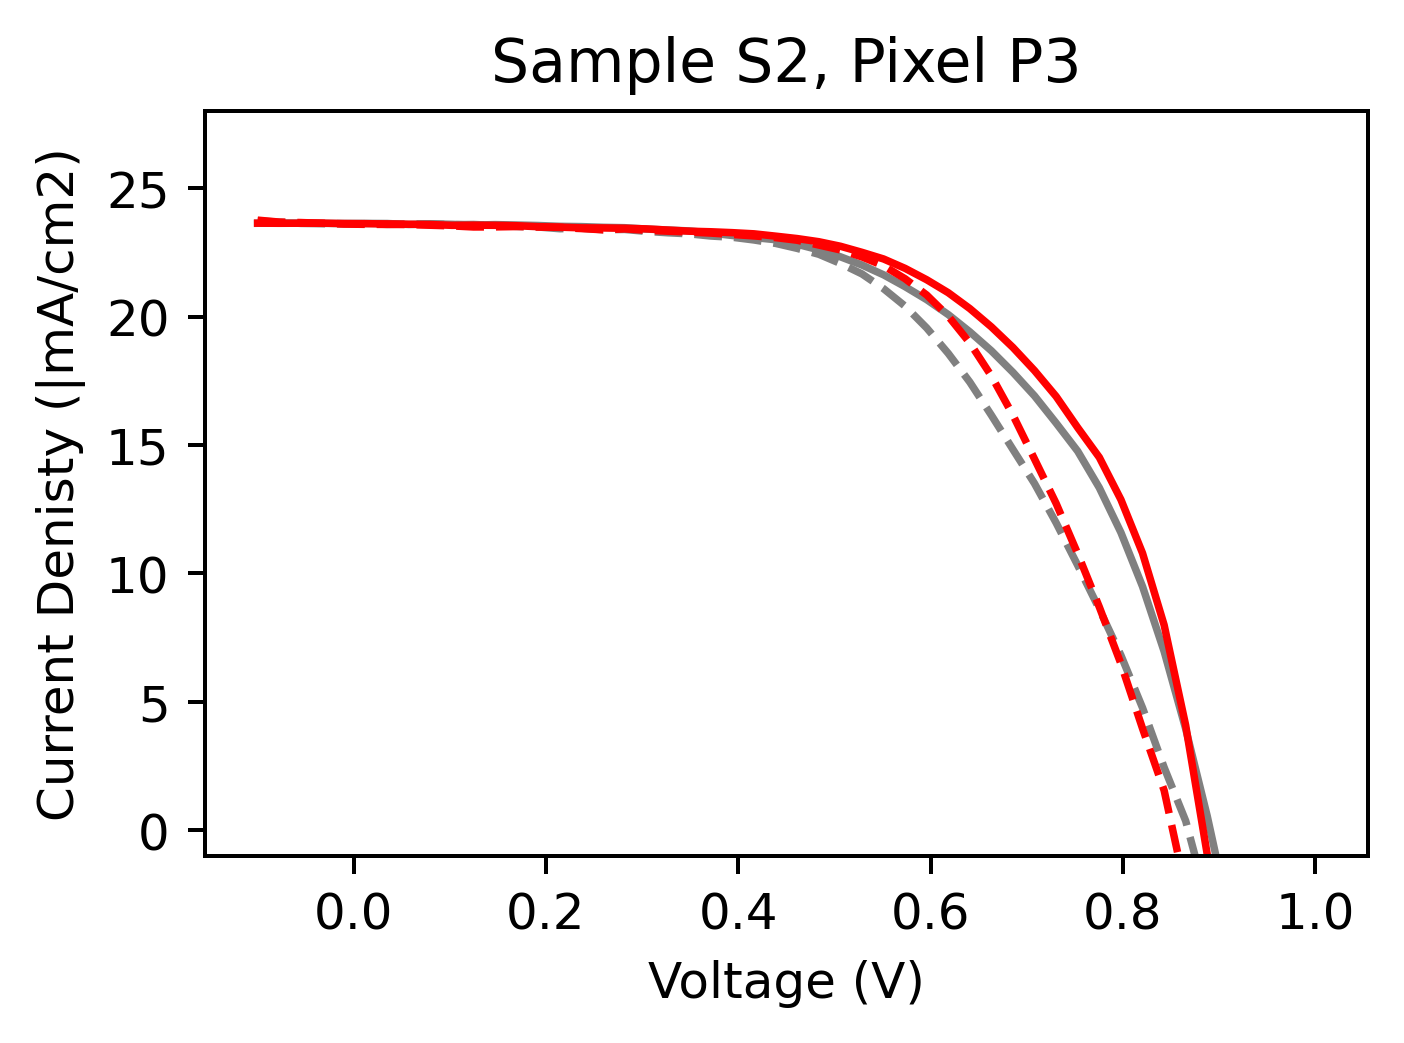

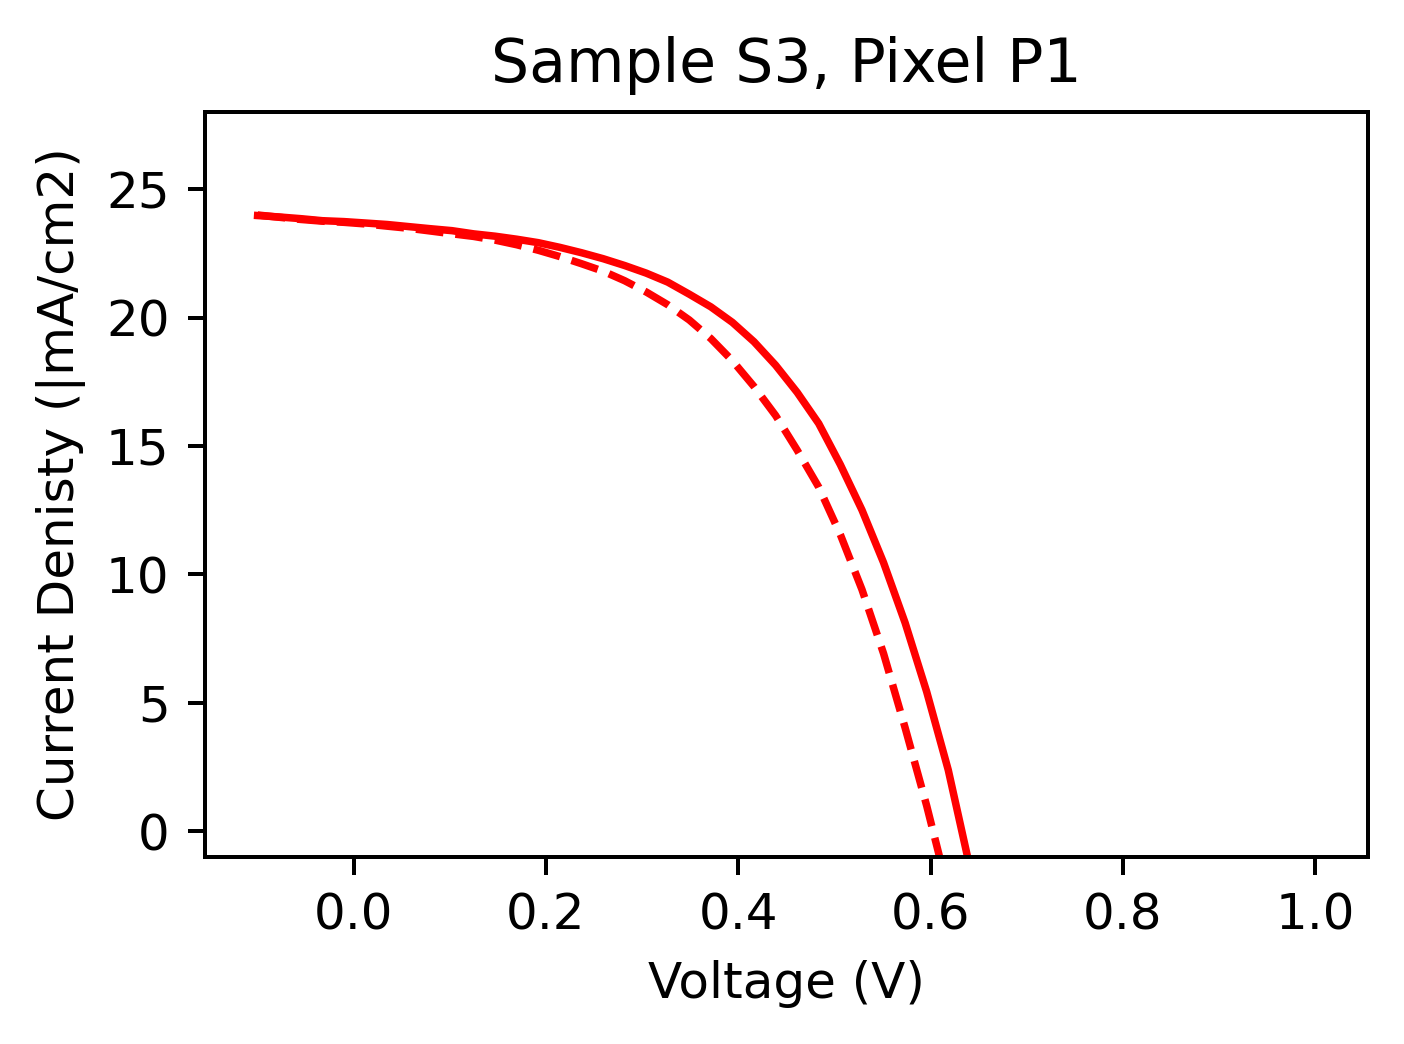

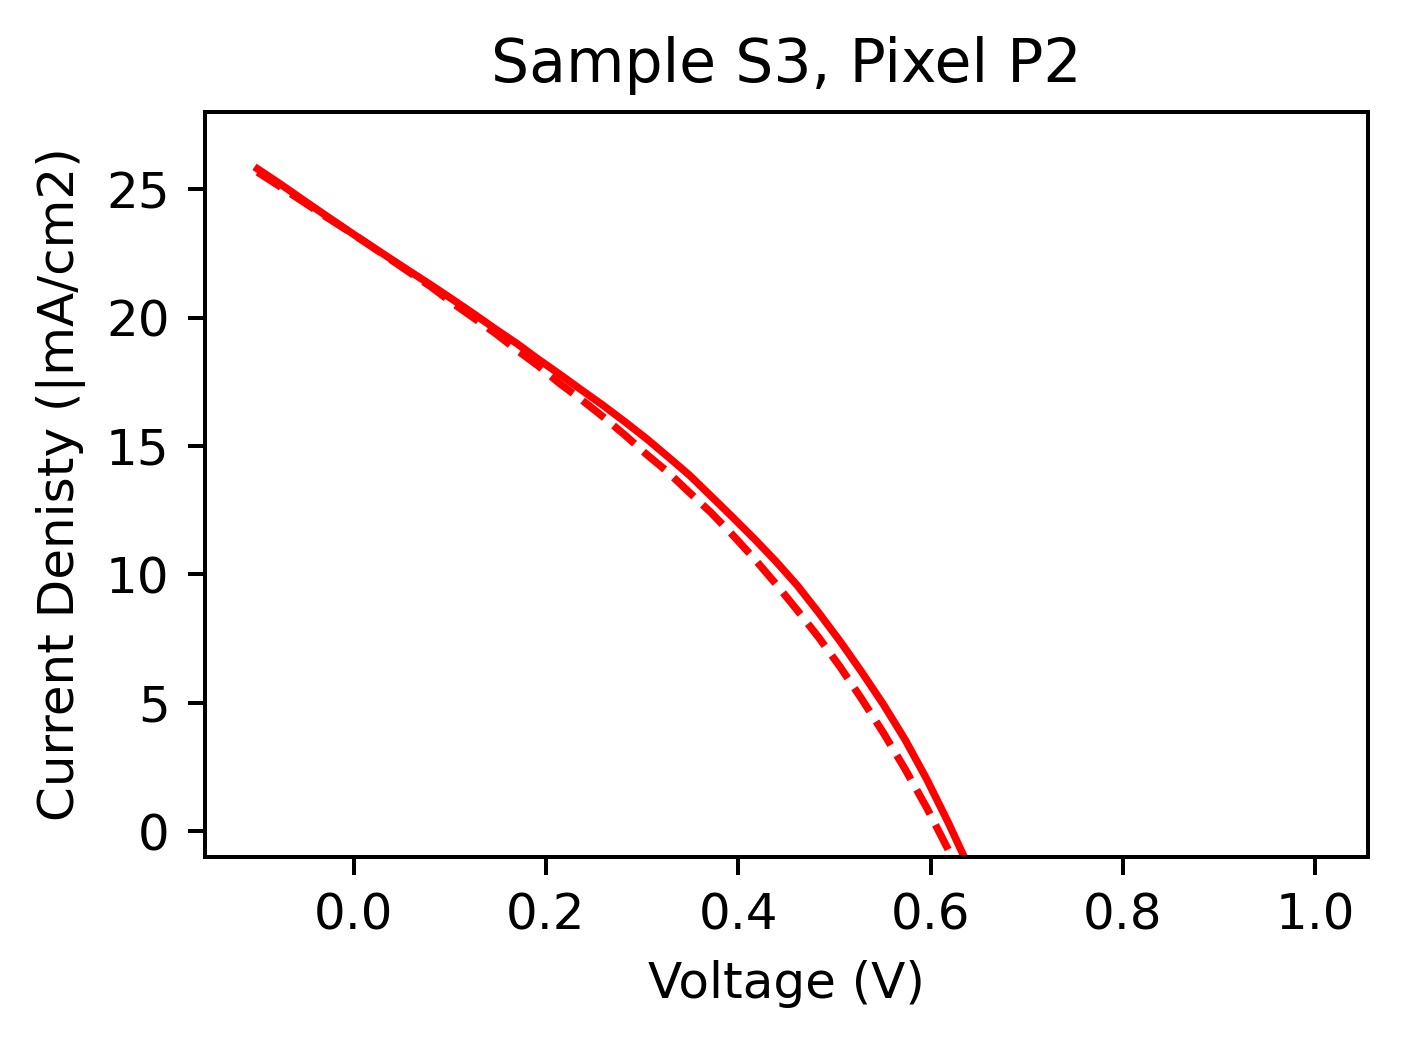

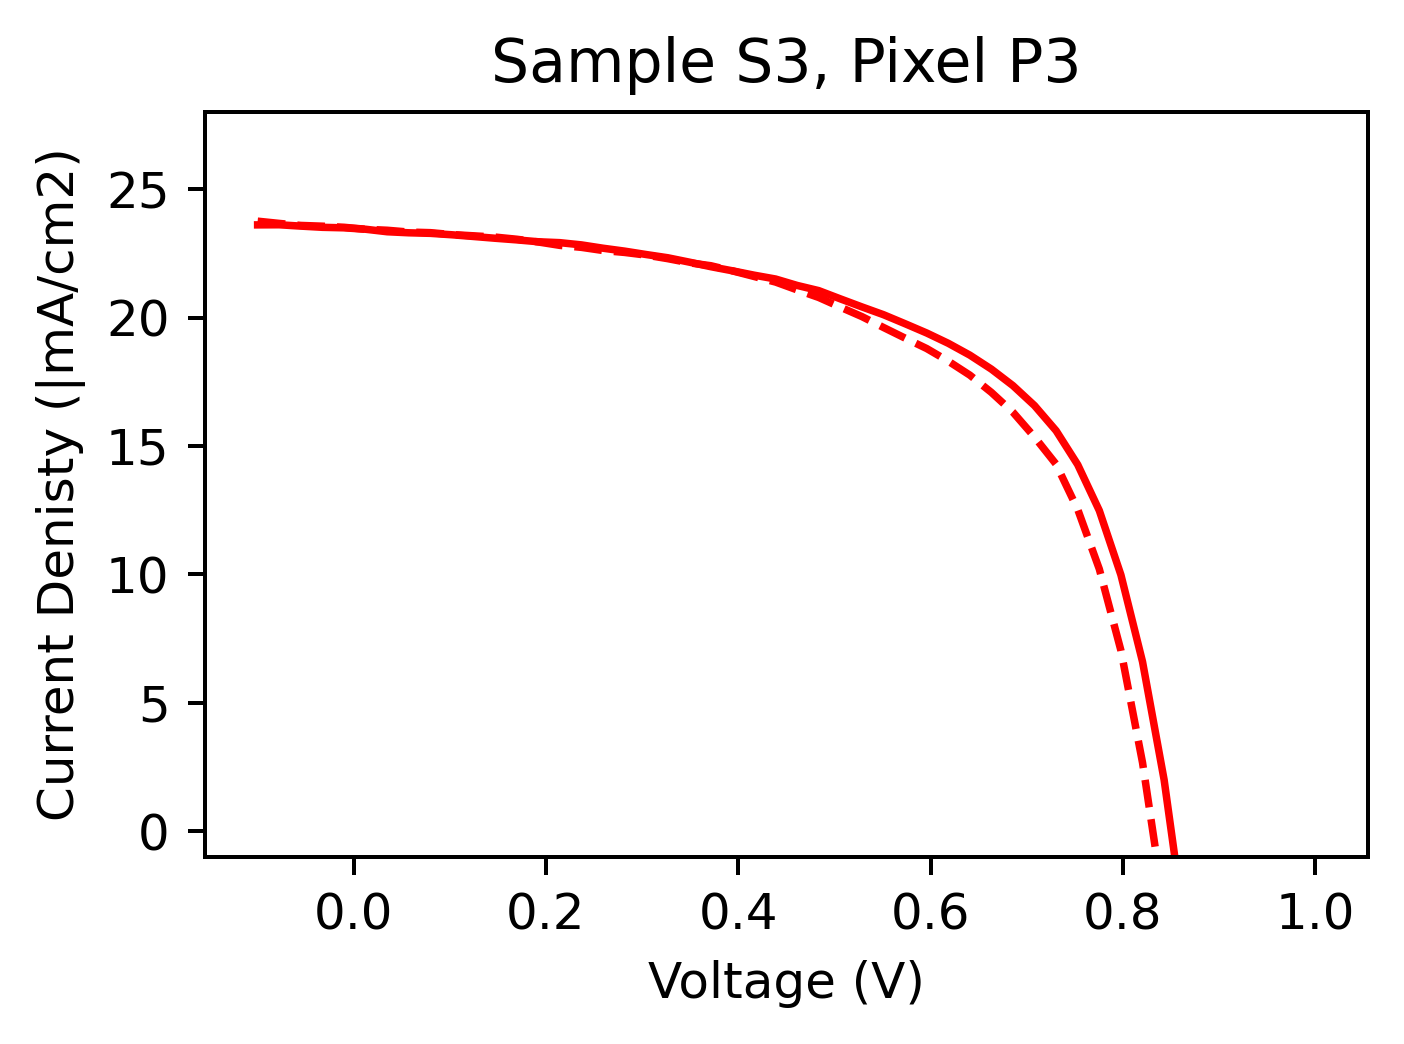

In [4]:
c.plot_substrates()

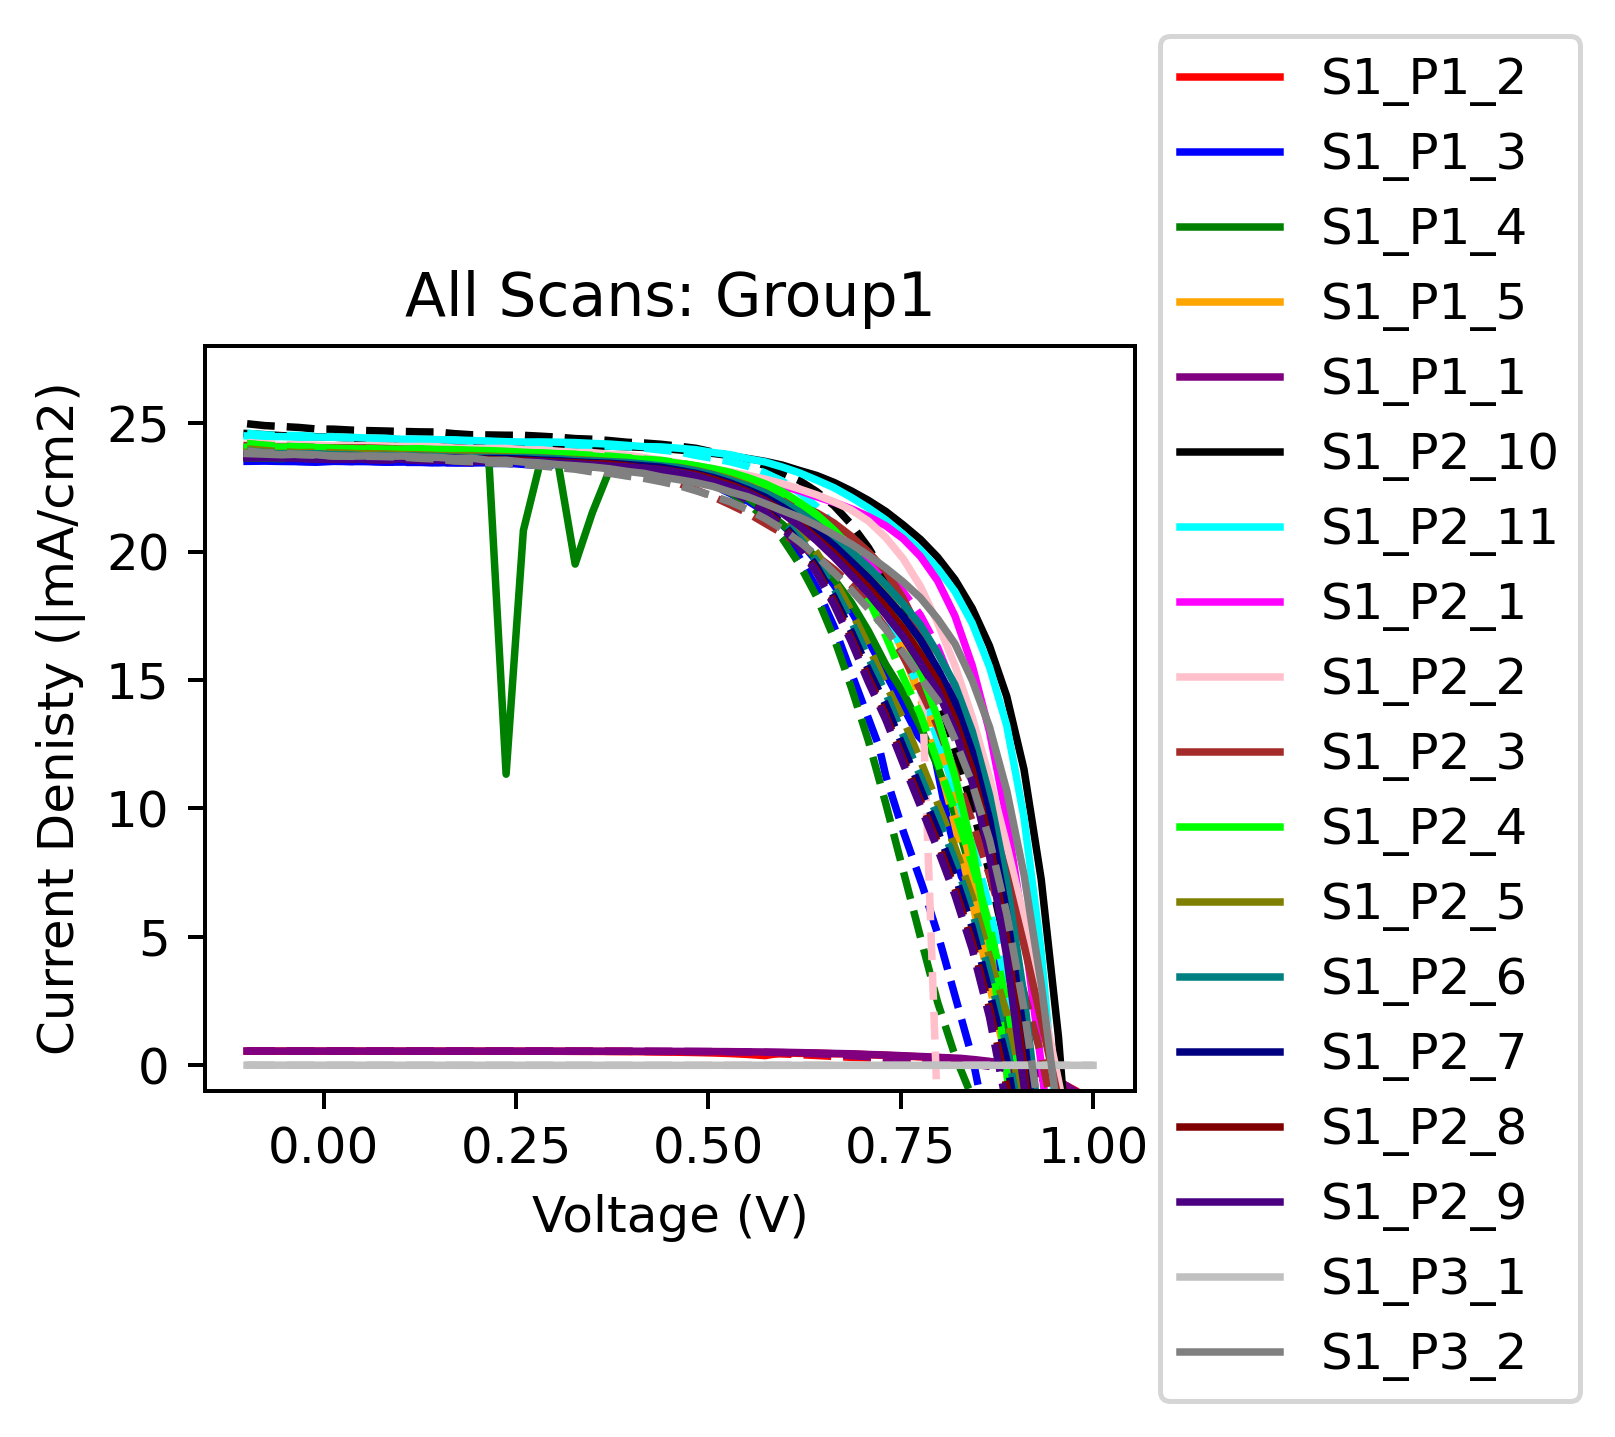

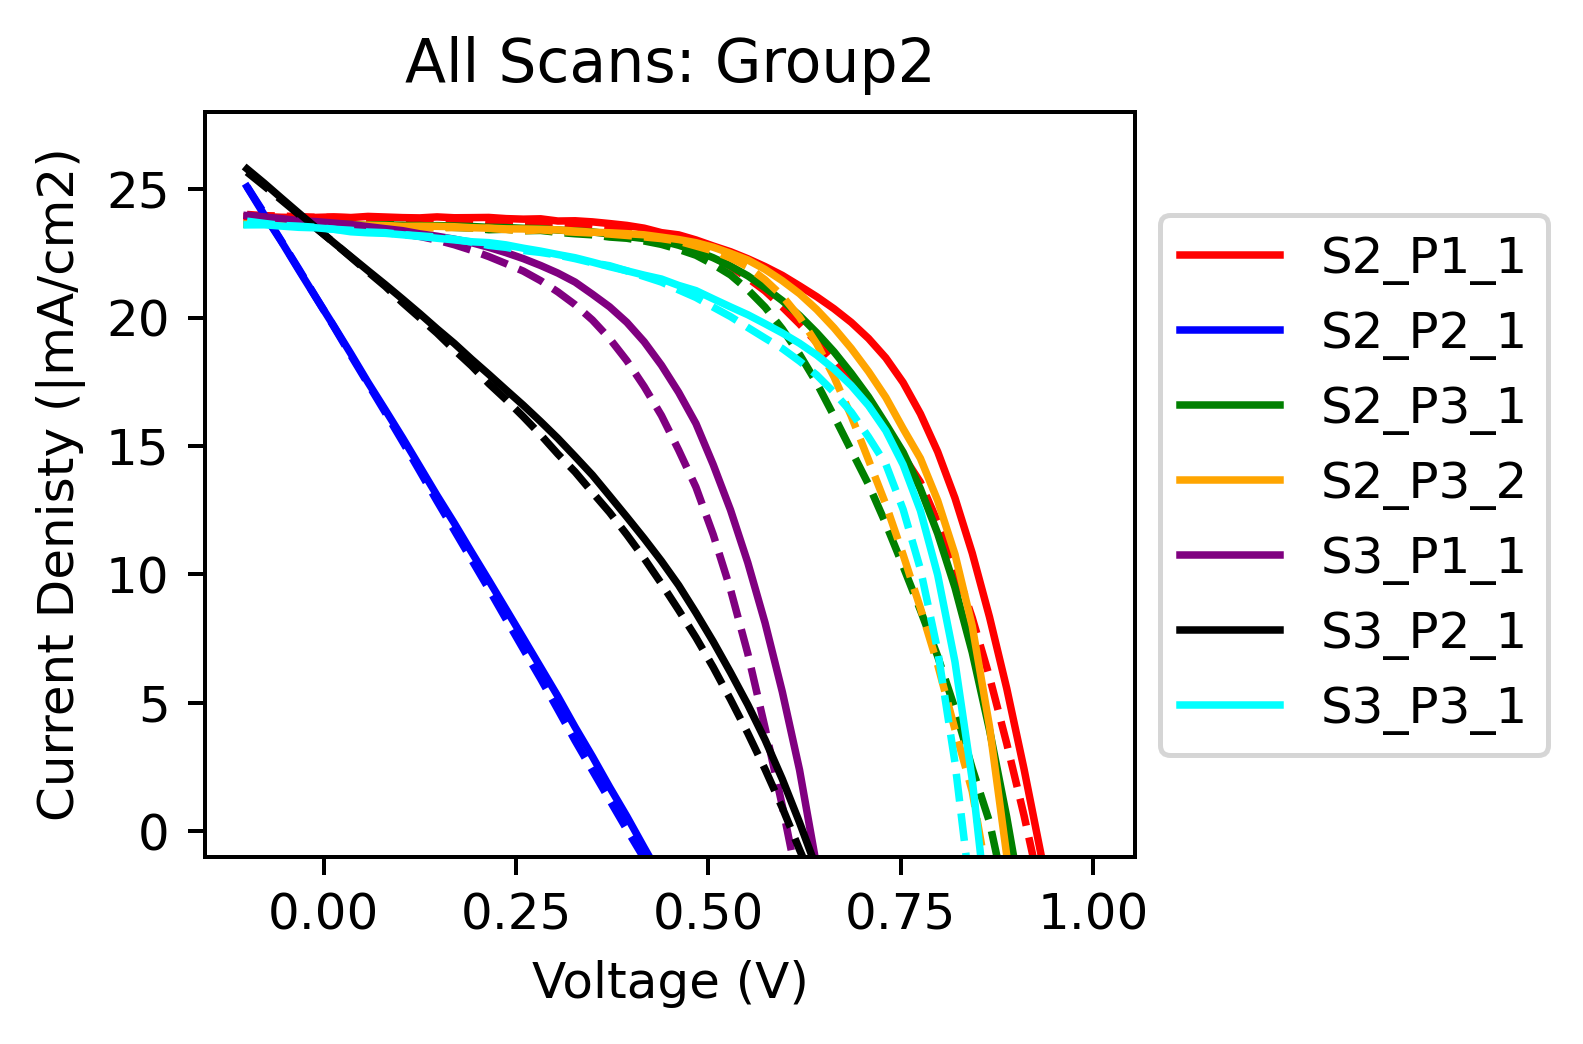

In [7]:
c.plot_groups_all()

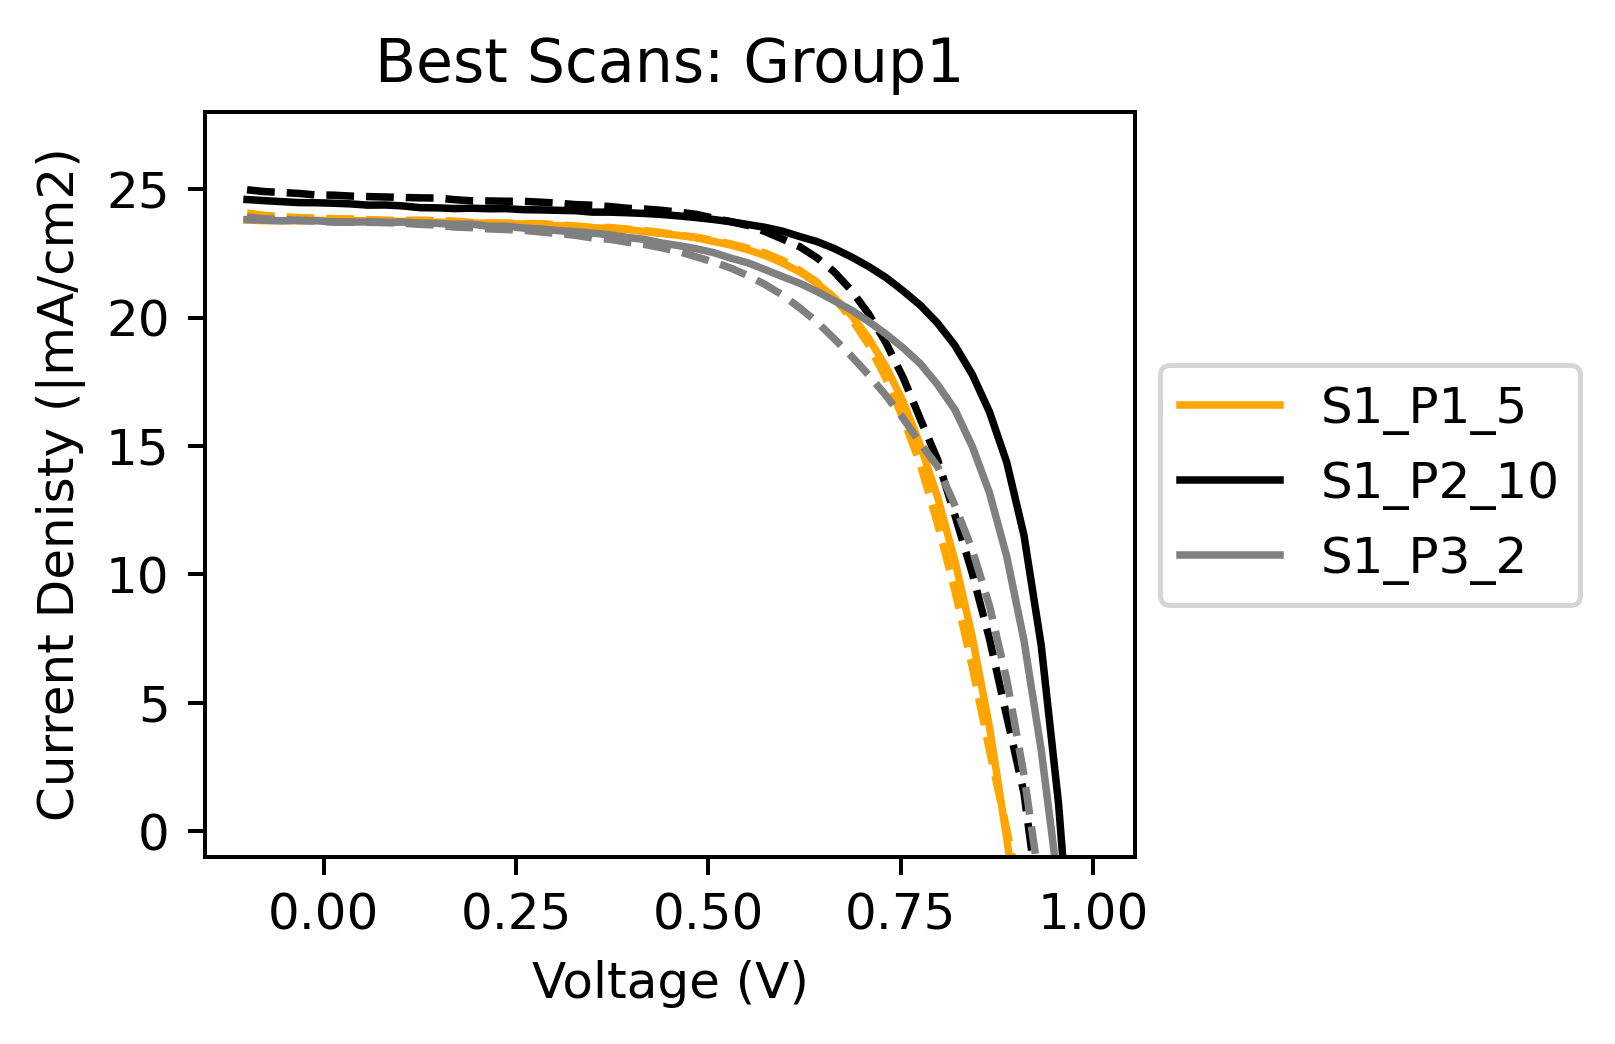

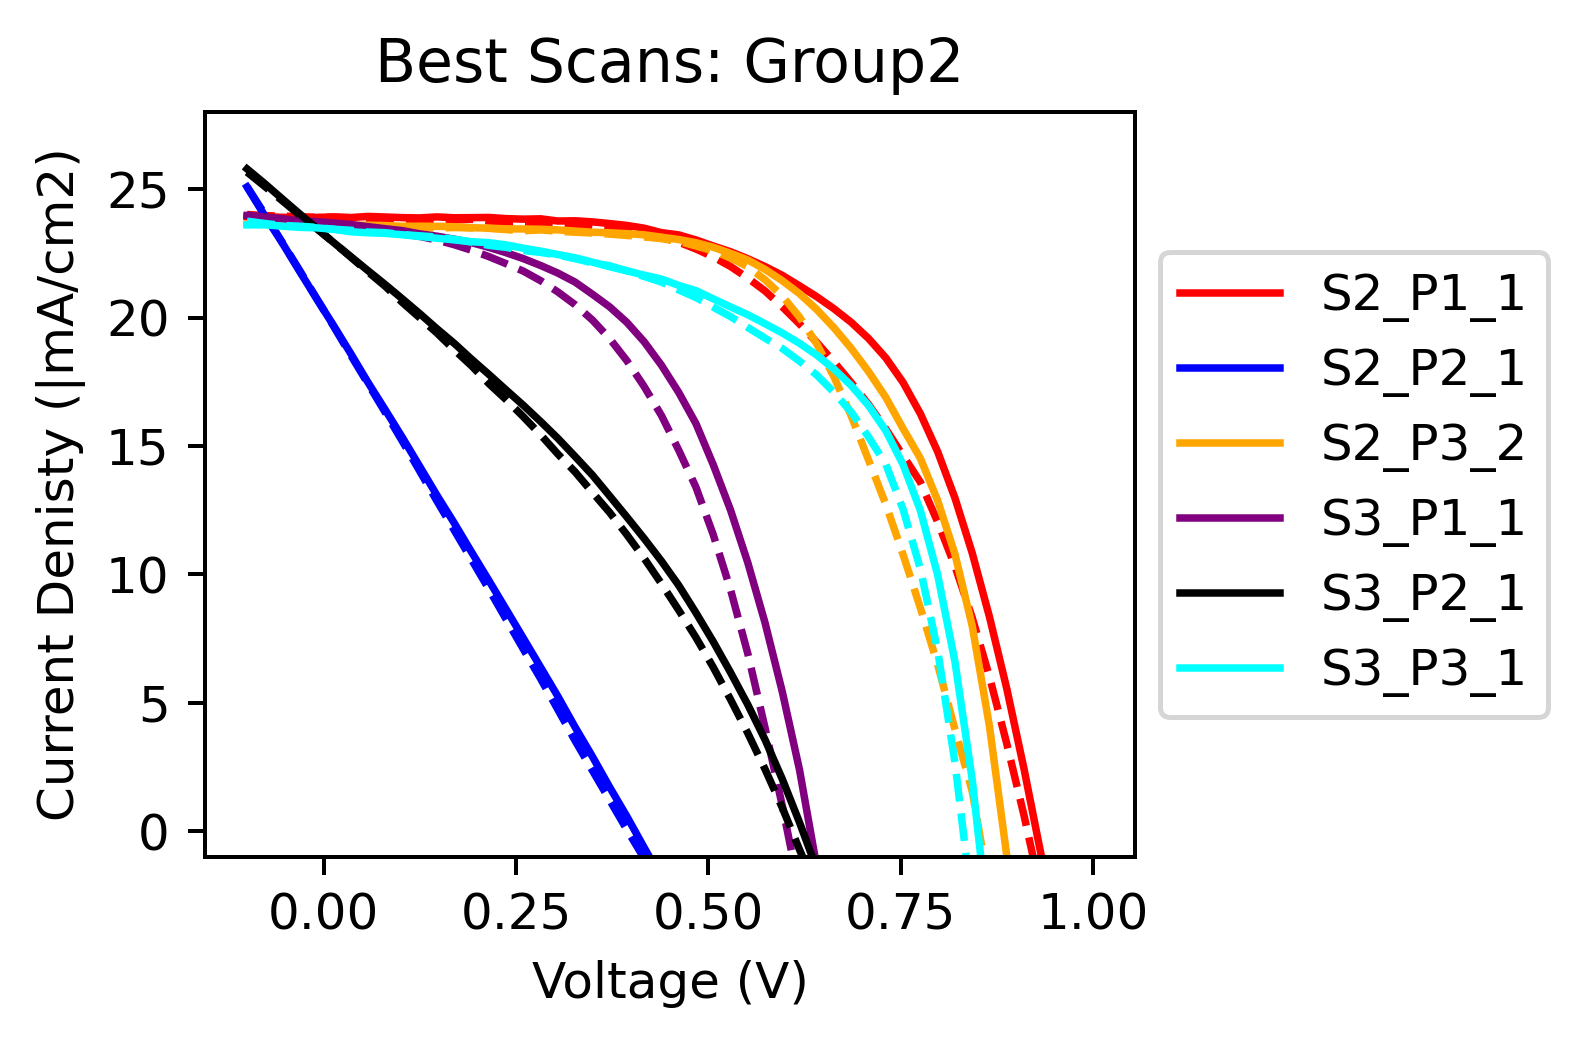

In [8]:
c.plot_groups_best()

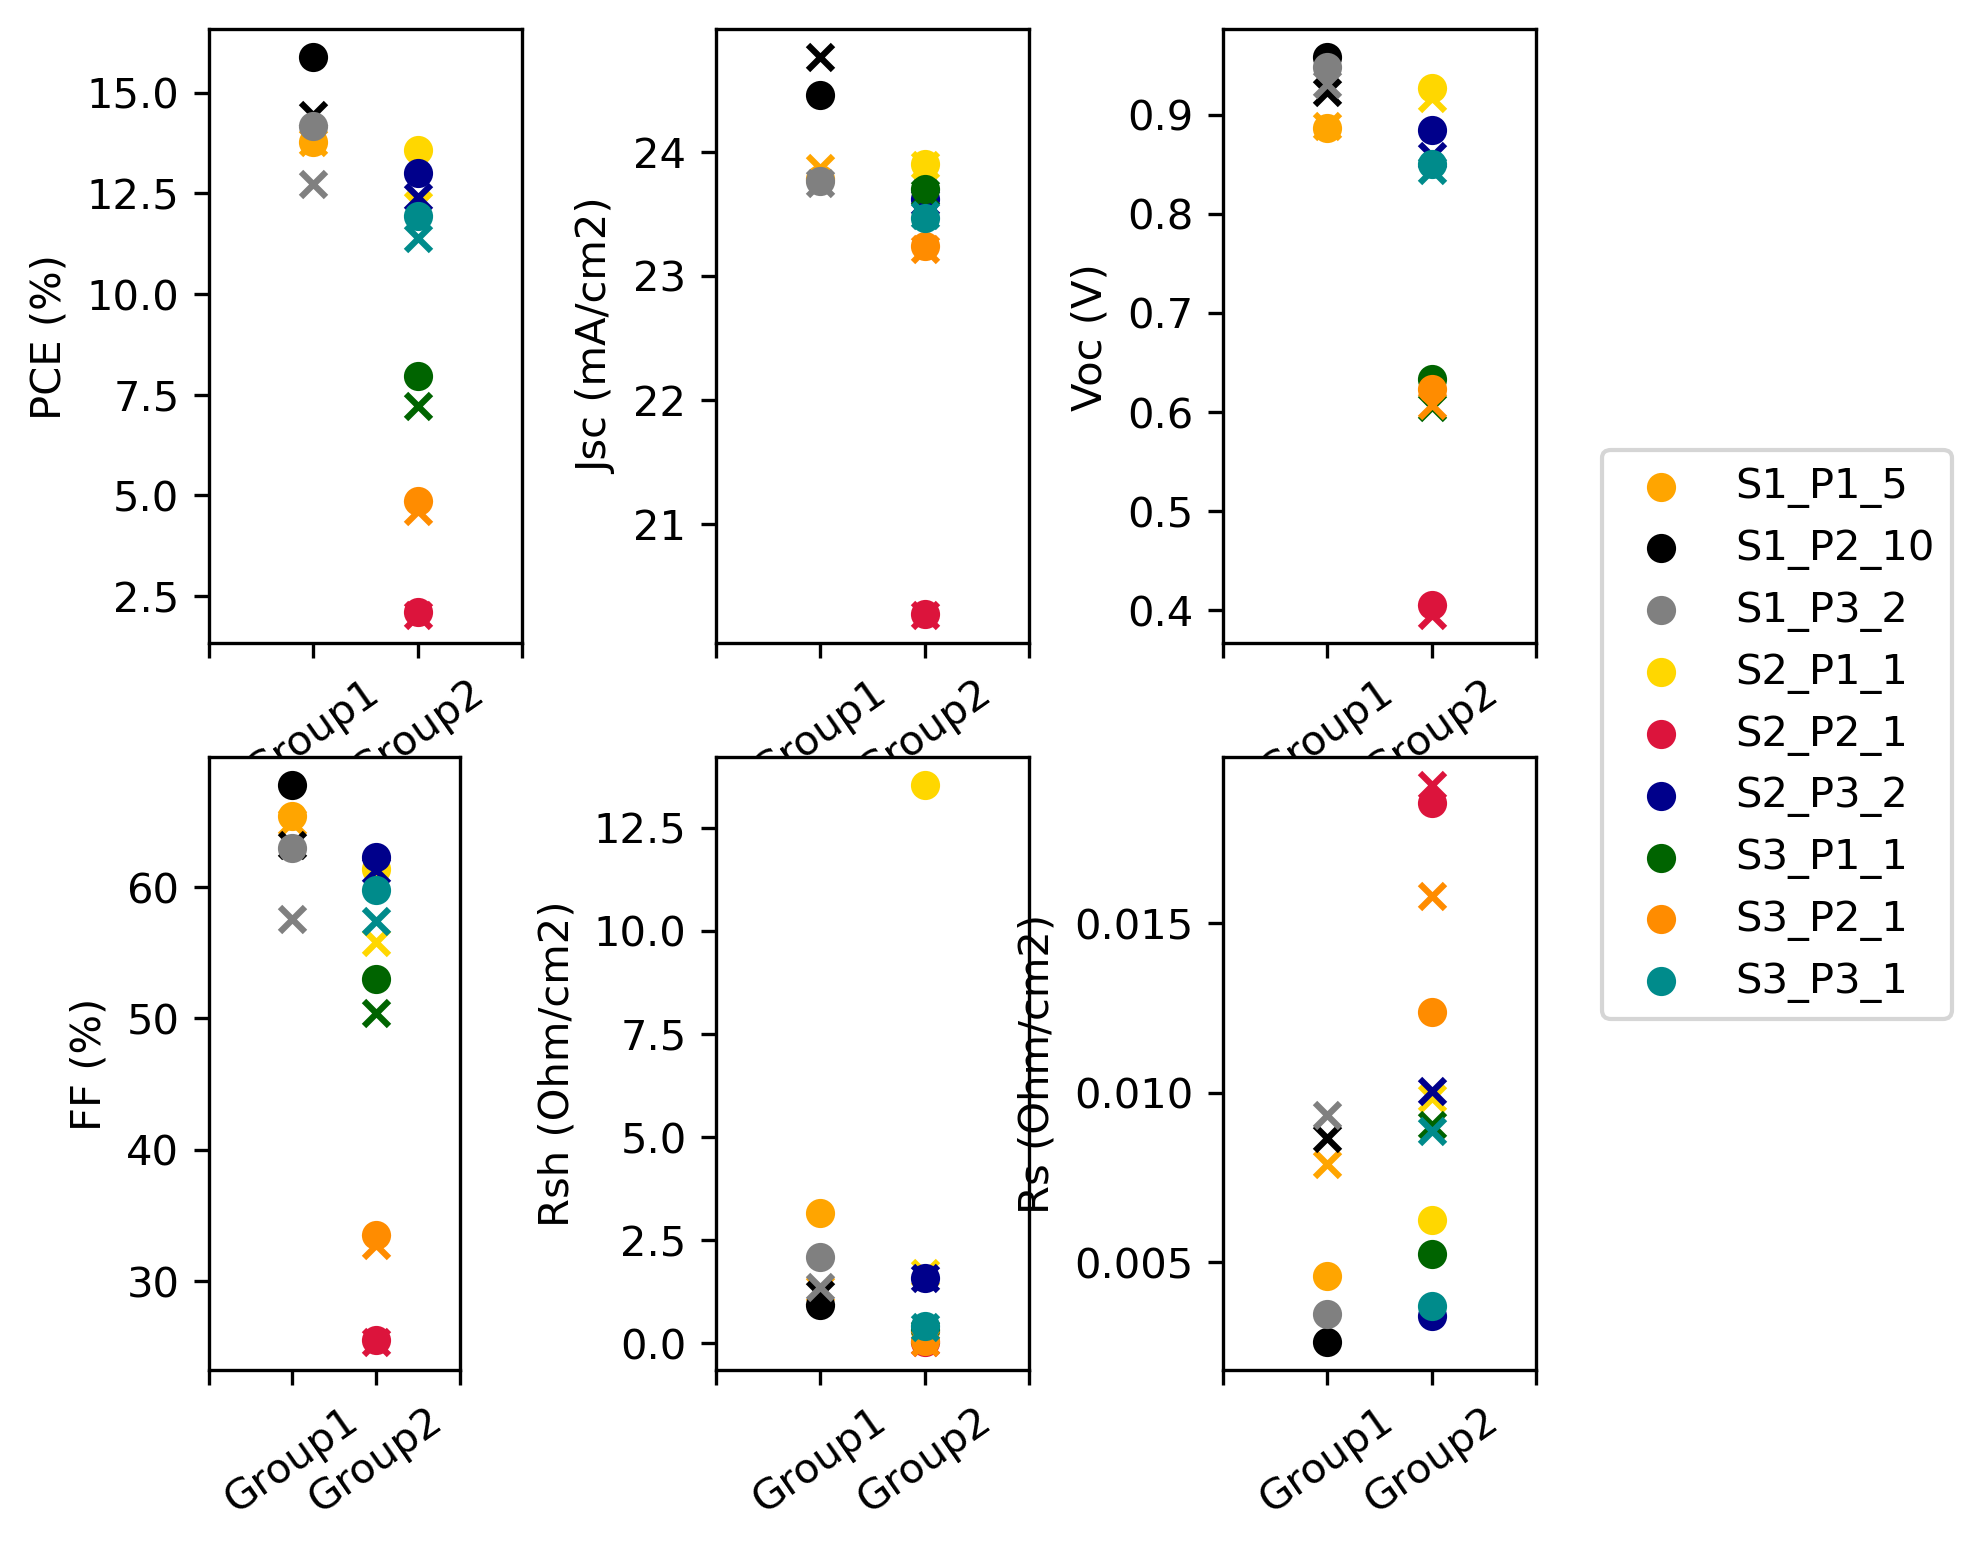

In [9]:
c.params_scatter()

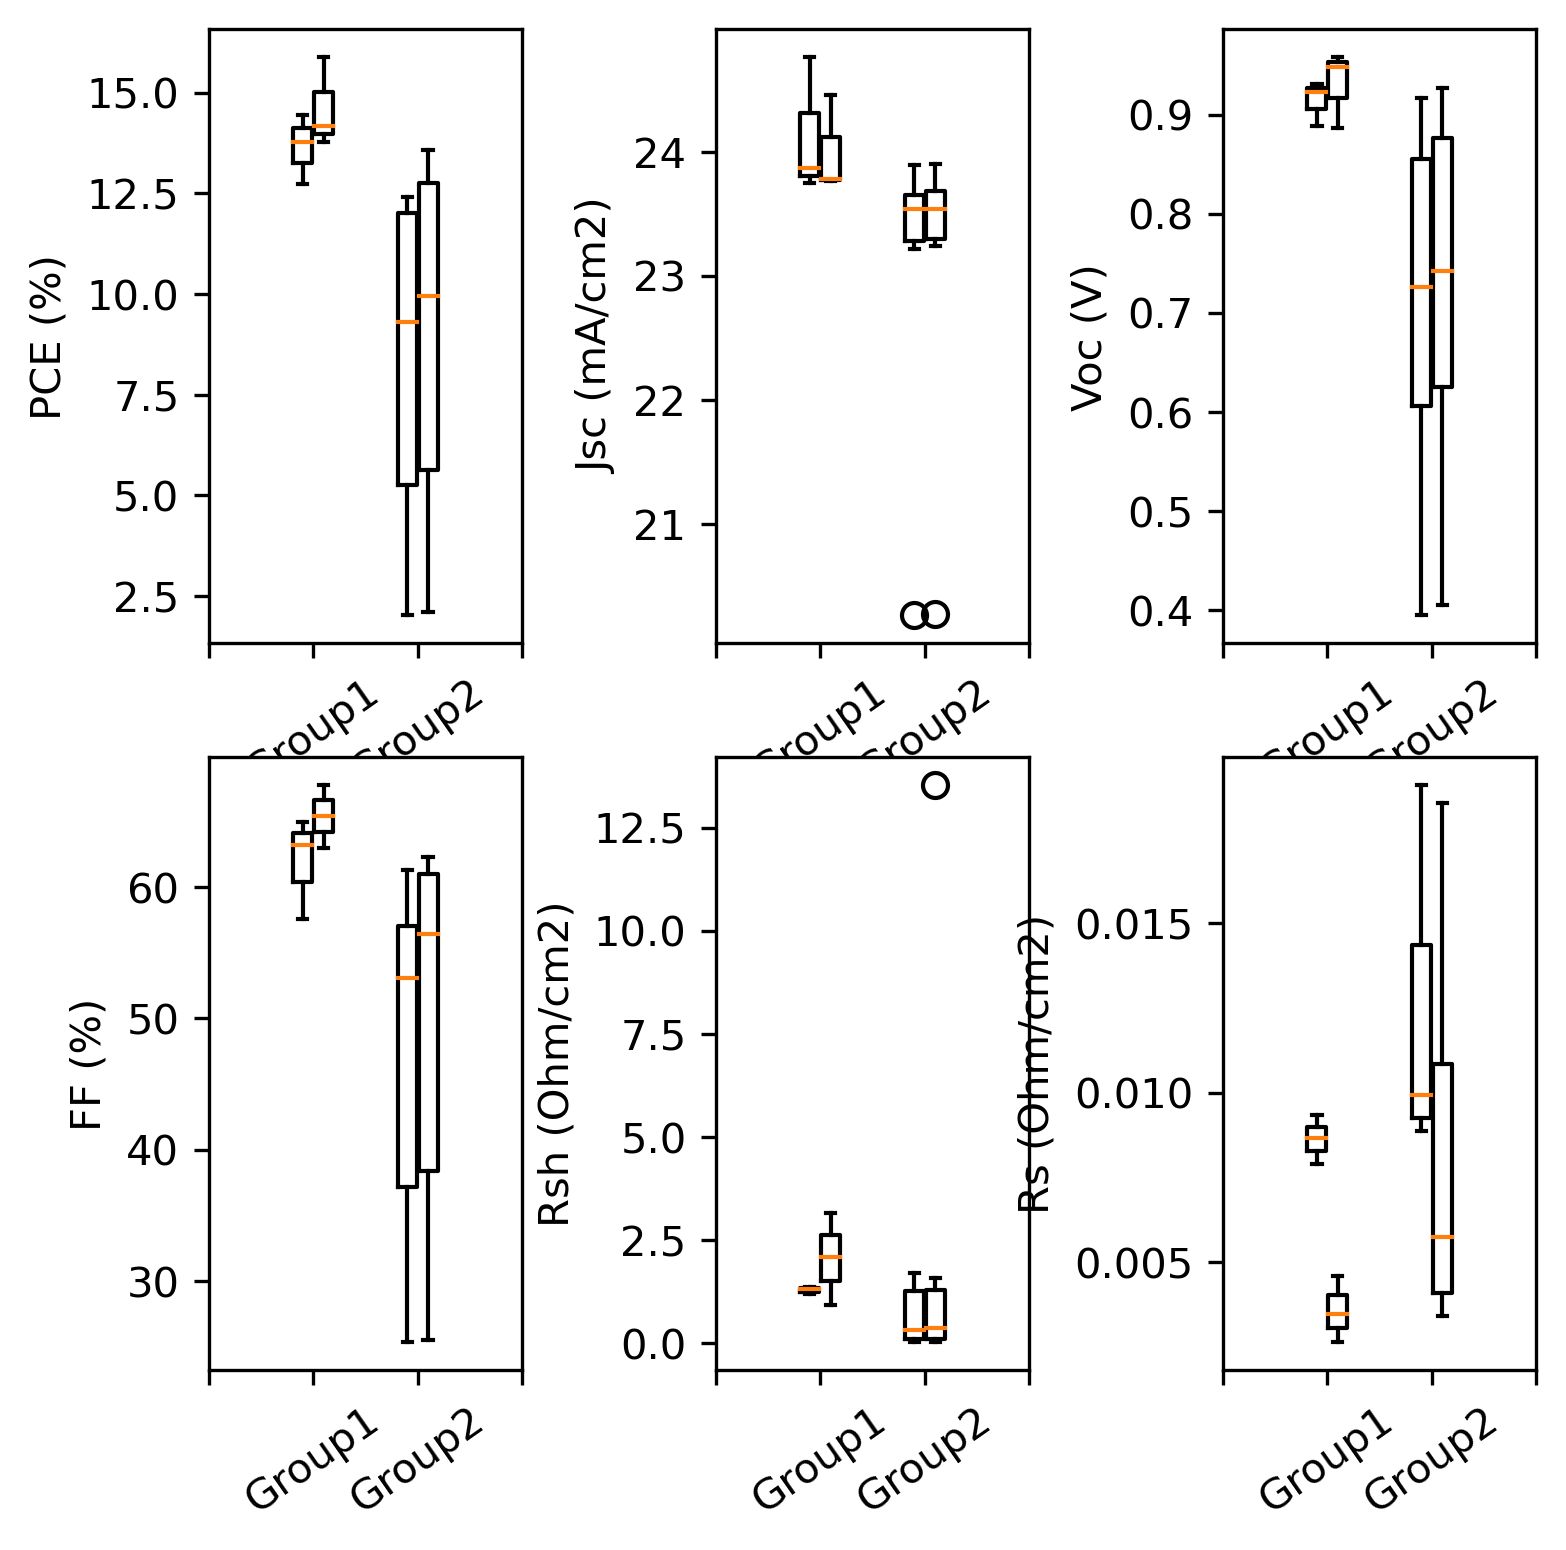

In [10]:
c.params_box()

In [11]:
c.params_df()

,Name,Fwd PCE (%),Fwd Jsc (mA/cm2),Fwd Voc (V),Fwd FF (%),Fwd Rsh (Ohm/cm2),Fwd Rs (Ohm/cm2),Rev PCE (%),Rev Jsc (mA/cm2),Rev Voc (V),Rev FF (%),Rev Rsh (Ohm/cm2),Rev Rs (Ohm/cm2)
0,S1_P1_5,13.773367,23.863739,0.888458,64.962788,1.306980,0.007911,13.783727,23.775607,0.886557,65.392541,3.143653,0.004595
1,S1_P2_10,14.447375,24.760631,0.923090,63.209618,1.183013,0.008651,15.878980,24.455858,0.958013,67.774818,0.922152,0.002634
2,S1_P3_2,12.721306,23.744947,0.930726,57.562379,1.366087,0.009348,14.172850,23.764121,0.947657,62.933875,2.076531,0.003476


,Name,Fwd PCE (%),Fwd Jsc (mA/cm2),Fwd Voc (V),Fwd FF (%),Fwd Rsh (Ohm/cm2),Fwd Rs (Ohm/cm2),Rev PCE (%),Rev Jsc (mA/cm2),Rev Voc (V),Rev FF (%),Rev Rsh (Ohm/cm2),Rev Rs (Ohm/cm2)
0,S2_P1_1,12.213401,23.892896,0.916393,55.780941,1.690104,0.009831,13.584410,23.896302,0.926791,61.337780,13.538255,0.006256
1,S2_P2_1,2.029340,20.265107,0.395132,25.343348,0.020069,0.019093,2.093225,20.270241,0.404604,25.522730,0.020635,0.018546
2,S2_P3_2,12.418822,23.592818,0.858600,61.306978,1.566611,0.010058,13.014736,23.613594,0.884640,62.302688,1.584589,0.003396
3,S3_P1_1,7.215242,23.664951,0.604974,50.397443,0.252361,0.009054,7.961718,23.701917,0.633540,53.021140,0.318194,0.005250
4,S3_P2_1,4.610578,23.213498,0.607107,32.715191,0.038785,0.015807,4.849233,23.239367,0.622654,33.512142,0.040547,0.012384
5,S3_P3_1,11.380056,23.486825,0.844204,57.394841,0.395428,0.008864,11.933076,23.466843,0.850408,59.795781,0.414955,0.003707
